In [2]:
import requests
from bs4 import BeautifulSoup
import os
from collections import Counter

In [3]:
curse_words = []

r = requests.get("https://www.noswearing.com/dictionary")

soup = BeautifulSoup(r.text, 'html.parser')

anchors = soup("html")[0]("body")[0]("div")[2]("a")

for a in anchors:
    url = a.get("href")
    
    r = requests.get(url)
    
    soup = BeautifulSoup(r.text, 'html.parser')
    
    words = soup.find_all("table")[2]("tr")[0]("td")[0]("b")
    
    curse_words += [word.text for word in words]
    
curse_hist = Counter([word[:1] for word in curse_words])

In [4]:
r = requests.get("http://www-personal.umich.edu/~jlawler/wordlist")

all_words = r.text.split("\r\n")

all_hist = Counter([word[:1] for word in all_words])

In [5]:
all_hist_p = {k:(v/len(all_words)) for k,v in dict(all_hist).items()}

In [6]:
curse_hist_p = {k:(v/len(curse_words)) for k,v in dict(curse_hist).items()}

In [7]:
import pandas as pd

In [8]:
adf = pd.Series(all_hist_p, name="English")
cdf = pd.Series(curse_hist_p, name="Cursing")

In [9]:
df = adf.to_frame().join(cdf.to_frame())
df = df.fillna(0)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

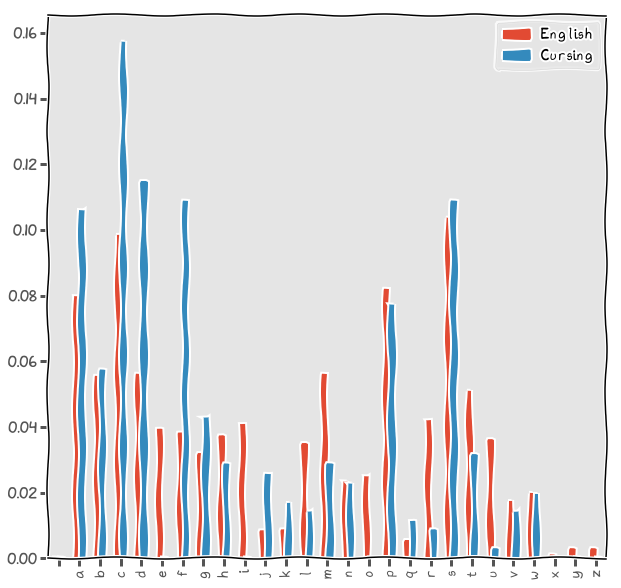

In [14]:
plt.xkcd()

plt.figure()

df.plot(kind='bar',figsize=(10,10))